In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#map csv
austin = "CSV/austin.csv"
#austin_df = pd.read_csv(austin)
austin_df = pd.read_csv(austin, encoding = 'latin-1')
austin_df.head()

,Unnamed: 0,Animal ID,Name_intake,DateTime_intake,MonthYear_intake,Found_Location,Intake_Type,IntakeCondition,Animal_Type_intake,Sex,...,beagle,terrier,boxer,poodle,rottweiler,dachshund,chihuahua,pit bull,DateTime_length,Days_length
0,0,A730601,NaN,7/7/2016 12:11,7/7/2016 12:11,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,...,0,0,0,0,0,0,0,0,0 days 20:49:00.000000000,0-7 days
1,1,A683644,*Zoey,7/13/2014 11:02,7/13/2014 11:02,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,...,0,0,0,0,0,0,0,0,115 days 23:04:00.000000000,12 weeks - 6 months
2,2,A676515,Rico,4/11/2014 8:45,4/11/2014 8:45,615 E. Wonsley in Austin (TX),Stray,Normal,Dog,Intact Male,...,0,0,0,0,0,0,0,1,3 days 09:53:00.000000000,0-7 days
3,3,A742953,NaN,1/31/2017 13:30,1/31/2017 13:30,S Hwy 183 And Thompson Lane in Austin (TX),Stray,Normal,Dog,Intact Male,...,0,0,0,0,0,0,0,0,4 days 00:47:00.000000000,0-7 days
4,4,A679549,*Gilbert,5/22/2014 15:43,5/22/2014 15:43,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,...,0,0,0,0,0,0,0,0,24 days 22:11:00.000000000,3-6 weeks


In [53]:
#this only gives the total amount of outcomes for each intake condition, or the total amount of animals for each condition
intakes_df = austin_df.groupby("IntakeCondition")
#outcome_df = intake_df.Outcome_Type.agg(["count"])
#outcome_df.head()

In [56]:
total=intakes_df.Outcome_Type.agg(["count"])
total

#outcome_df= outcome_df.rename(columns={"Outcome_Type" : "Adoptions", "IntakeCondition" : "Intake Condition"})
#outcome_df

,count
IntakeCondition,
Aged,305
Feral,78
Injured,3581
Normal,68521
Nursing,1602
Other,132
Pregnant,48
Sick,2703


In [23]:
#basic bar chart for adoption 
x_axis = ["Aged", "Feral", "Injured", "Normal", "Nursing", "Other", "Pregnant", "Sick"]
y_axis = outcome_df["Adoptions"]
plt.bar(x_axis, y_axis, color = 'r', alpha=0.5)

#tick Locations
#tick_locations = [value+0.4 for value in x_axis]
#plt.xticks(x_axis)

# Give our chart some labels and a tile
plt.title("Number of Adoptions for Each Type of Intake Condition")
plt.xlabel("Intake Condition")
plt.ylabel("Adoptions")

# Print our chart to the screen
plt.show()


AttributeError: 'NoneType' object has no attribute 'seq'

In [16]:
intake_all = austin_df.groupby("IntakeCondition")
#outcome_df = intake_df.Outcome_Type.agg(["count"])
#outcome_df.head()

In [17]:
outcomes = intake_all["Outcome_Type"].value_counts()
outcomes_df = pd.DataFrame(outcomes)
outcomes_df

Outcome_Type
IntakeCondition Outcome_Type                 
Aged            Return to Owner           113
                Euthanasia                 69
                Adoption                   68
                Transfer                   50
                Died                        4
                Missing                     1
Feral           Transfer                   54
                Adoption                   15
                Return to Owner             5
                Euthanasia                  4
Injured         Euthanasia               1241
                Adoption                  889
                Transfer                  761
                Return to Owner           562
                Died                       91
                Disposal                   27
                Relocate                    5
                Rto-Adopt                   3
                Missing                     2
Normal          Adoption                30502
                Transfer                18022
                Return to Owner         16488
                Euthanasia               2928
                Died                      336
                Disposal                  175
                Missing                    42
                Rto-Adopt                  20
                Relocate                    8
Nursing         Transfer                 1030
                Adoption                  418
                Died                       55
                Euthanasia                 53
                Return to Owner            42
                Missing                     3
                Disposal                    1
Other           Transfer                   51
                Adoption                   32
                Return to Owner            32
                Euthanasia                 17
Pregnant        Adoption                   20
                Transfer                   19
                Return to Owner             8
                Died                        1
Sick            Euthanasia               1158
                Transfer                  812
                Adoption                  464
                Return to Owner           146
                Died                       66
                Disposal                   54
                Missing                     3

In [40]:
outcomes = austin_df["Outcome_Type"].unique()
outcomes

array(['Transfer', 'Adoption', 'Return to Owner', 'Euthanasia', 'Disposal',
       'Died', 'Rto-Adopt', 'Missing', nan, 'Relocate'], dtype=object)

In [9]:
#results for adoption
adopt_df = austin_df.loc[(austin_df['Outcome_Type'] == "Adoption"), : ]
types_df = adopt_df.groupby("IntakeCondition")
outcome_adopt = types_df.Outcome_Type.agg(["count"])
outcome_adopt = outcome_adopt.rename(columns={"count" : "Adoptions", "IntakeCondition" : "Intake Condition"})
#age_value = age_value.rename(columns={"Age" : "Number of Players"})
outcome_adopt


,Adoptions
IntakeCondition,
Aged,68
Feral,15
Injured,889
Normal,30502
Nursing,418
Other,32
Pregnant,20
Sick,464


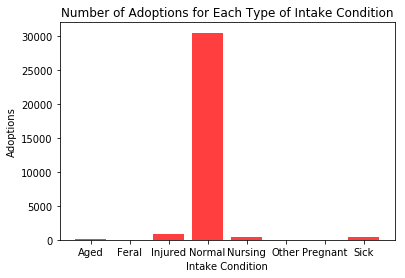

In [13]:
#basic bar chart for adoption 
x_axis = outcome_adopt.index.values
y_axis = outcome_adopt["Adoptions"]
plt.bar(x_axis, y_axis, color = 'r', alpha=0.5)

#tick Locations
#tick_locations = [value+0.4 for value in x_axis]
#plt.xticks(x_axis)

# Give our chart some labels and a tile
plt.title("Number of Adoptions for Each Type of Intake Condition")
plt.xlabel("Intake Condition")
plt.ylabel("Adoptions")

# Print our chart to the screen
plt.show()



AttributeError: 'NoneType' object has no attribute 'seq'